# E-commerce site clients segmentation

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Selection of variables to use in our analysis](#Selection-of-variables-to-use-in-our-analysis)
- [Data cleaning](#Data-cleaning)
- [Merge of tables by keys](#Merge-of-tables-by-keys)
- [Feature engineering](#Feature-engineering)
- [Base for the cluster maintenance analysis](#Base-for-the-cluster-maintenance-analysis)
- [Pickling dataframe](#Pickling-dataframe)

## Context of the problem

* Olist wants us to provide to their e-commerce teams information about customer segmentation that they can use for their daily communication campaigns.

* Our goal is to understand the different types of users through their behavior and personal data. We need to provide the marketing team an actionable description of the customer segmentation and the underlying logic for optimal use, as well as a maintenance contract proposal based on an analysis of segment stability over time.

* Olist provides an anonymized database containing information on order history, products purchased, satisfaction comments, and customer location since January 2017.

* The mission is to help Olist teams understand the different types of users. We will therefore use unsupervised methods to group customers with similar profiles. These categories can be used by the Marketing team to better communicate.

*  **Olist internal dashboards suggest that only 3% of customers in the data have made several orders. The data available will be sufficient to perform a first clustering.**

* The proposed segmentation must be easy to use by Olist Marketing team. It must be able to differentiate between good and less good customers in terms of orders and satisfaction. Olist expect segmentation on all customers as well.

* **Once the segmentation model has been chosen, Olist would like us to recommend how often the segmentation should be updated to remain relevant, in order to be able to quote a maintenance contract.**


This dataset was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

See more on our website: https://olist.com/pt-br/

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention:
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

https://www.kaggle.com/olistbr/brazilian-ecommerce

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

The database is divided in multiple datasets for better understanding and organization.

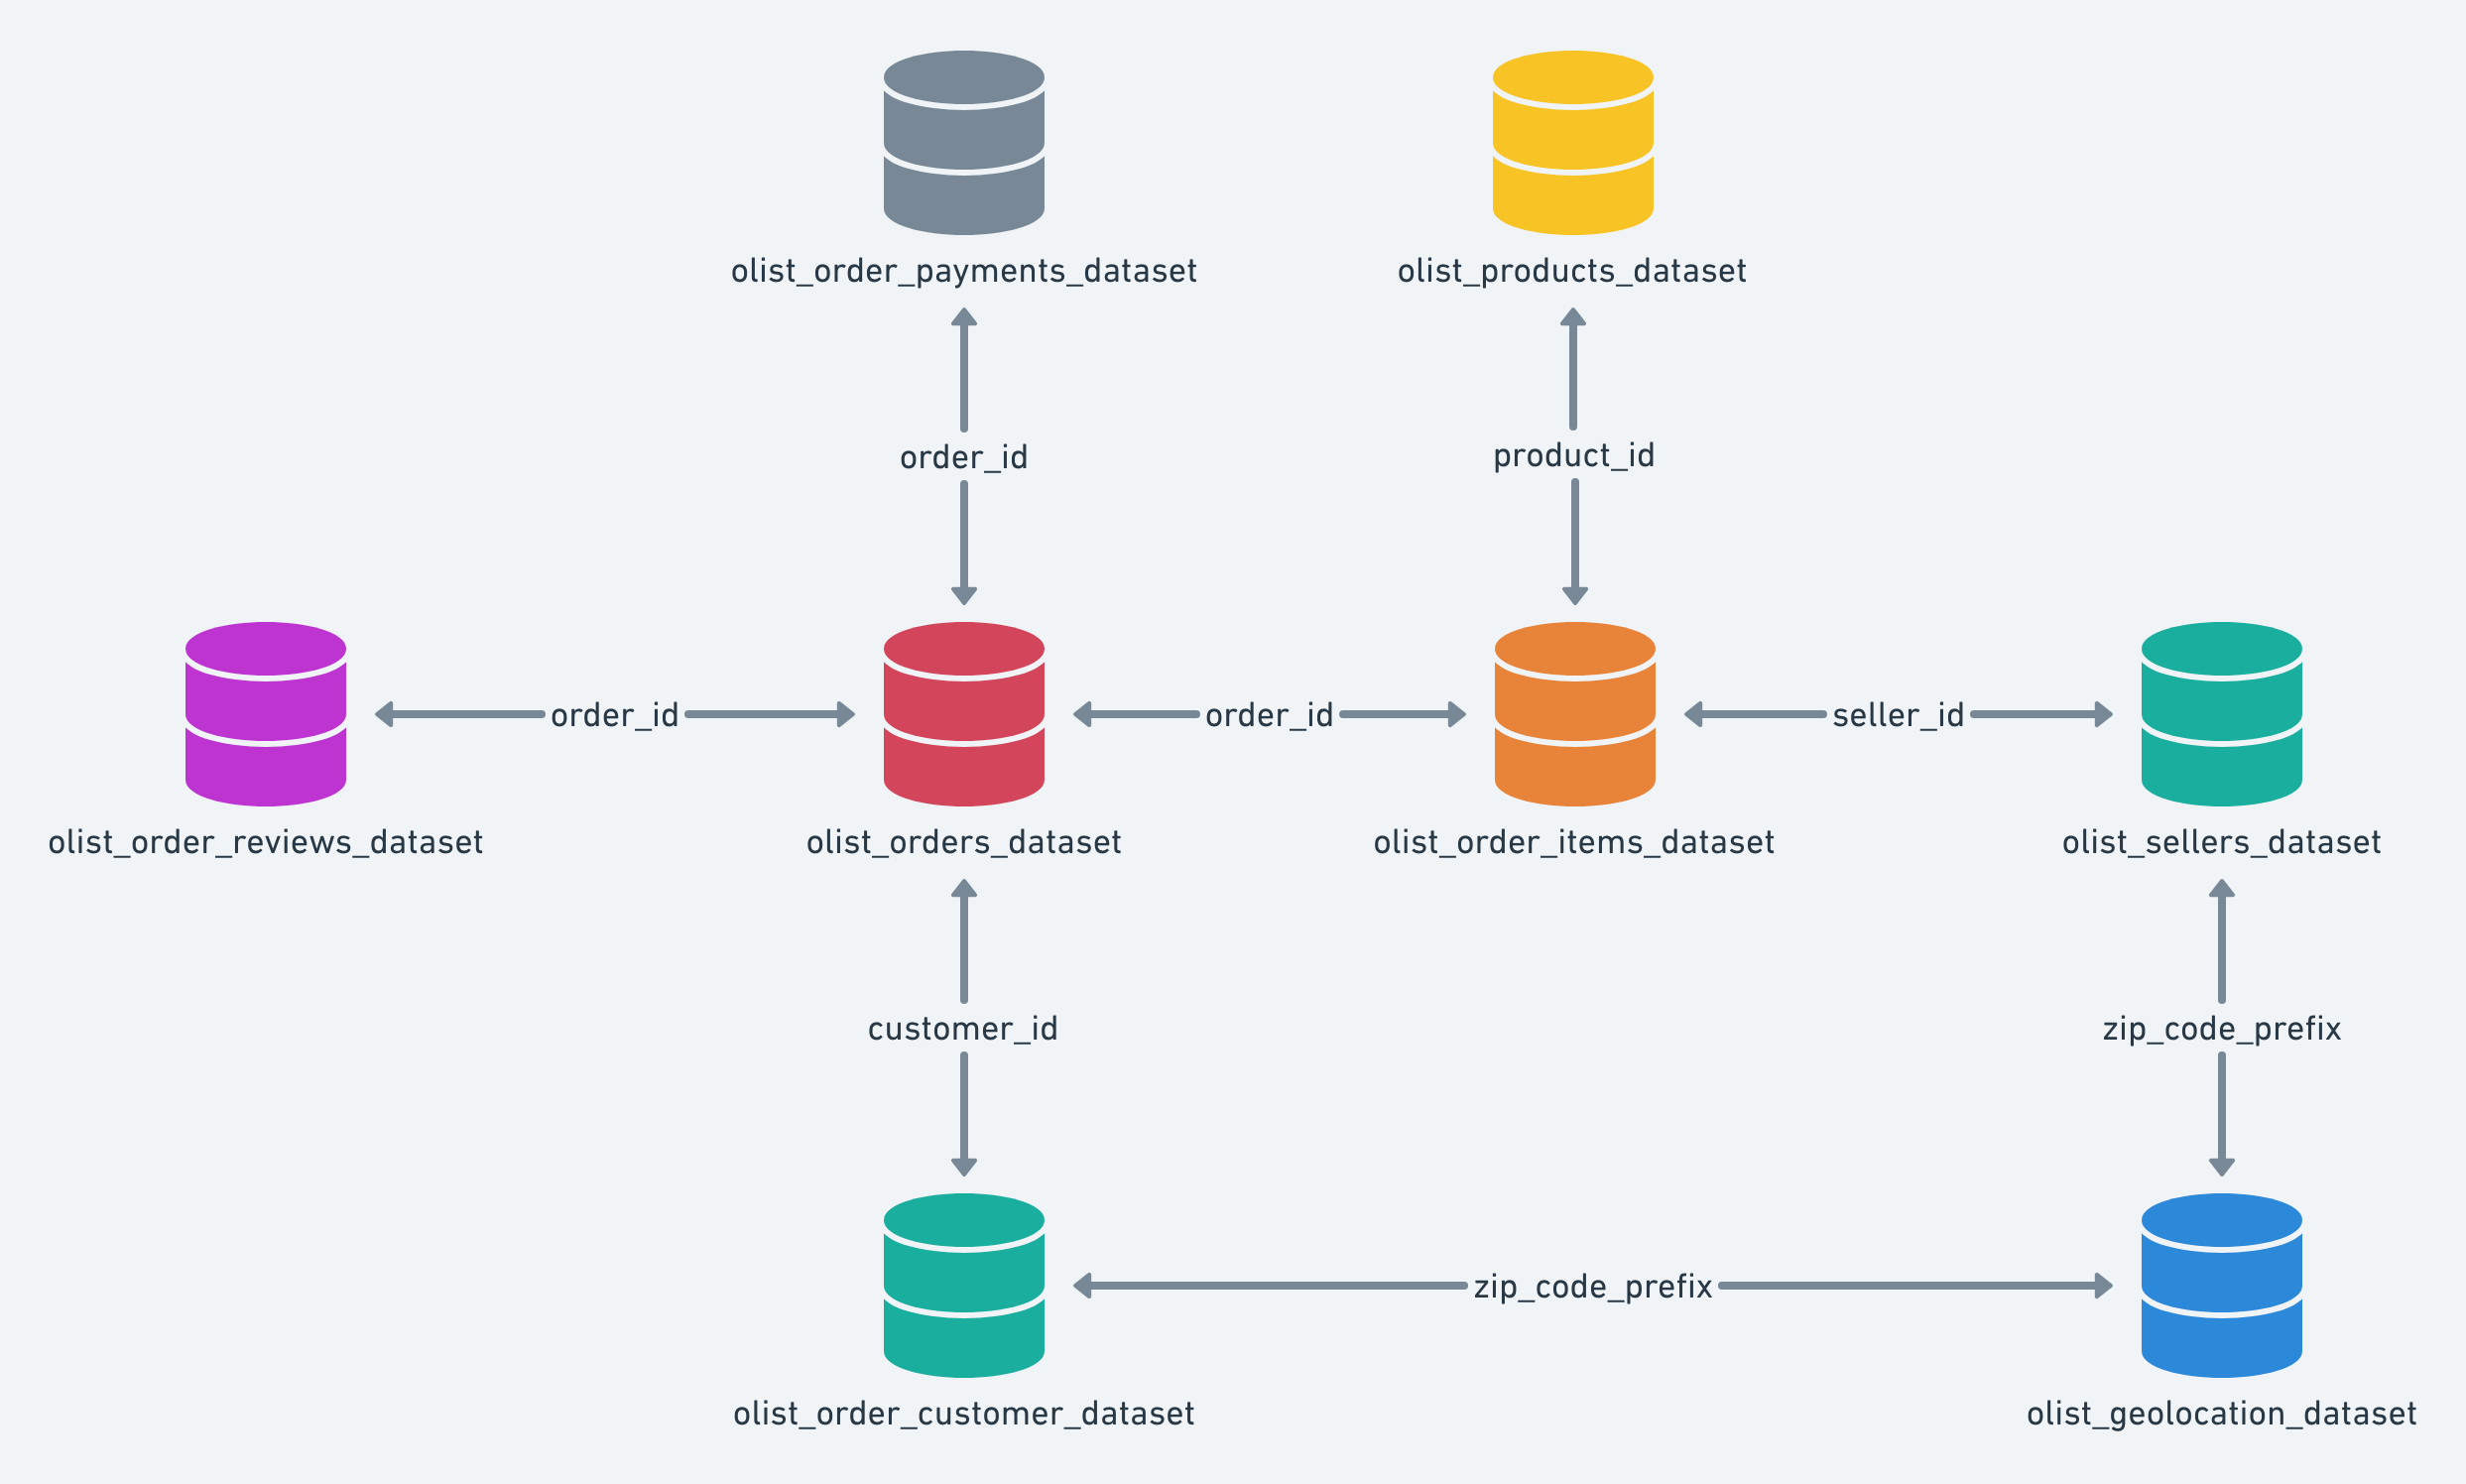

In [128]:
%matplotlib inline
from IPython.display import Image
Image('HRhd2Y0.png')

## Pre-exploratory stage: General analysis and discovery of the files

### Olist customer data file

In [129]:
olist_customers_df = pd.read_csv('olist_customers_dataset.csv')
olist_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The customers dataset contains:
* **customer_id:** key to the orders dataset. Each order has a unique customer_id.
* **customer_unique_id**: unique identifier of a customer.

It also contains information about the customer: 
* **zip code, city and state.**

### Olist geolocation data file

In [130]:
olist_geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
olist_geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


The geolocation dataset contains information about geographical coordinates of a determined city.

### Olist order items data file

In [131]:
olist_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The order items dataset contains information about orders, such as:
* The **order unique identifier**, 
* The **product unique identifier**, 
* The **seller unique identifier**, 
* The **shipping date**, 
* **price per item** and, 
* **freight value per item**. 

If an order has more than one item the freight value is splitted between items. 

The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same or different products). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

* The total order_item value is: 21.33 * 3 = 63.99

* The total freight value is: 15.10 * 3 = 45.30

* The total order value (freight + product) is: 45.30 + 63.99 = 109.29

See reference and data documentation: https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

The previously indicated can be useful for performing feature engineering.

The 'order_item_id' is a sequential number that indicates the number of items included in the same order.

In [132]:
olist_order_items_df[olist_order_items_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [133]:
olist_order_items_df[olist_order_items_df['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
43082,62073ec6b54b8e6322037fc0f3591ad3,1,1eba879220bd0981a0e2fbab499ed4e1,5058e8c1e82653974541e83690655b4a,2018-04-23 20:29:09,79.99,13.73
43083,62073ec6b54b8e6322037fc0f3591ad3,2,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-04-17 20:29:09,179.90,133.85
43084,62073ec6b54b8e6322037fc0f3591ad3,3,1eba879220bd0981a0e2fbab499ed4e1,5058e8c1e82653974541e83690655b4a,2018-04-23 20:29:09,79.99,13.73
43085,62073ec6b54b8e6322037fc0f3591ad3,4,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-04-17 20:29:09,179.90,133.85
43086,62073ec6b54b8e6322037fc0f3591ad3,5,1eba879220bd0981a0e2fbab499ed4e1,5058e8c1e82653974541e83690655b4a,2018-04-23 20:29:09,79.99,13.73
43087,62073ec6b54b8e6322037fc0f3591ad3,6,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-04-17 20:29:09,179.90,133.85
43088,62073ec6b54b8e6322037fc0f3591ad3,7,1eba879220bd0981a0e2fbab499ed4e1,5058e8c1e82653974541e83690655b4a,2018-04-23 20:29:09,79.99,13.73


### Olist order payments data file

In [134]:
olist_order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


The order payments dataset includes data about the orders payment options. It contains: 
* The **order unique identifier**,  
* The **payment method or type** chosen by the customer, 
* **payment sequential** indicates when a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments, 
* **payment or transaction value** and, 
* **payment installments** chosen by the customer.

### Olist order reviews data file

In [135]:
olist_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


The order reviews dataset contains information about: 
* The **order unique identifier**, 
* **review unique identifier**, 
* **review score** which is a score ranging from 1 to 5 given by the customer on a satisfaction survey, 
* **review title and review comment** which is left by the customer in Portuguese, 
* **creation date** that shows the date in which the satisfaction survey was sent to the customer and, 
* the **review answer timestamp** that shows satisfaction survey answer timestamp.

### Olist orders data file

In [136]:
olist_orders_df = pd.read_csv('olist_orders_dataset.csv')
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


The orders dataset contains: 
* The **order unique identifier**, 
* the **customer unique identifier** that is the key to the customer dataset (each order has a unique customer identifier), 
* the **order status** (delivered, shipped, etc), 
* the **order purchase timestamp** that shows the purchase timestamp, 
* the **order approval timestamp** that shows the payment approval timestamp,
* the **order delivered carrier date** that shows the order posting timestamp. When it was handled to the logistic partner,
* the **order delivered customer date** that shows the actual order delivery date to the customer and,
* the **estimated delivery date of the order** that shows the estimated delivery date that was informed to customer at the purchase moment.

### Olist products data file

In [137]:
olist_products_df = pd.read_csv('olist_products_dataset.csv')
olist_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The product dataset contains information about the **product unique identifier** and product description.

### Olist sellers data file

In [138]:
olist_sellers_df = pd.read_csv('olist_sellers_dataset.csv')
olist_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


The sellers dataset contains the sellers information such as: 
* **seller unique id** and 
* **sellers geographical location**.

### Olist product category name translation in english data file

In [139]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


The products category dataset contains: 
* The **product category name** in portuguese and 
* **product category name translated** in english. 

### Number of columns, rows, and the number of missing values

Part of the files discovery is their number of columns and rows, and the number of missing values.

In [140]:
list_data_files = [
            'olist_customers_dataset',
            'olist_geolocation_dataset',
            'olist_order_items_dataset', 
            'olist_order_payments_dataset',
            'olist_order_reviews_dataset',
            'olist_orders_dataset',
            'olist_products_dataset',
            'olist_sellers_dataset',
            'product_category_name_translation'
            ]

list_data_frames = [
            olist_customers_df,
            olist_geolocation_df,
            olist_order_items_df, 
            olist_order_payments_df,
            olist_order_reviews_df,
            olist_orders_df,
            olist_products_df,
            olist_sellers_df,
            product_category_name_translation_df
            ]
                    

In [141]:
for datafile, df in zip(list_data_files, list_data_frames):
    print("The {} file contains: {} rows and {} columns".format(datafile, df.shape[0], df.shape[1]))
    print("Missing or nan values of:\n{}".format(df.isna().sum(axis=0)))
 

The olist_customers_dataset file contains: 99441 rows and 5 columns
Missing or nan values of:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
The olist_geolocation_dataset file contains: 1000163 rows and 5 columns
Missing or nan values of:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
The olist_order_items_dataset file contains: 112650 rows and 7 columns
Missing or nan values of:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
The olist_order_payments_dataset file contains: 103886 rows and 5 columns
Missing or nan values of:
order_id                0
payment_sequential      0
payment_type            0
paym

## Selection of variables to use in our analysis

We will select the variables for our analysis. Those include the keys 

From the customers dataset we will keep:
* **customer_id**, which is the key to the orders datasets.
* **customer_unique_id**, unique identifier of a customer. It is important to remark that a customer_unique_id can have several customer_id values. The reason is that in Olist's system, each order is assigned to a customer_unique_id. This means that the same customer will get different ids (customer_id) for different orders. The purpose of having a customer_unique_id on the dataset is to allow to identify customers that made purchases several times.
See reference in: https://www.kaggle.com/olistbr/brazilian-ecommerce
* **customer_zip_code_prefix**.
* **customer_city**.
* **customer_state**.

From the customers geolocation dataset we will keep:
* **geolocation_zip_code_prefix**. 
* **geolocation_lat**.
* **geolocation_lng**.

From the order items dataset we will keep:
* **order_item_id**.
* **order_id**. 
* **product_id**. 

From the order payments dataset we will keep:
* **order_id**.
* **payment_type**.
* **payment_value**.

From the order reviews dataset we will keep:
* **review_id**.
* **order_id**.
* **review_score**.

From the orders datset we will kepp:
* **order_id**.
* **customer_id**.
* **order_purchase_timestamp**.
* **order_delivered_customer_date**.

From the products dataset we will keep:
* **product_id**.
* **product_category_name**.

From the product category name dataset we will keep:
* **product_category_name**.
* **product_category_name_english**.

In the next cell we will eliminate the columns that we will not include for our analysis.

In [142]:
olist_geolocation_df = olist_geolocation_df.drop(columns = ['geolocation_city', 
                                                                'geolocation_state'])

olist_order_items_df = olist_order_items_df.drop(columns = ['seller_id',
                                                            'shipping_limit_date', 
                                                            'price', 
                                                            'freight_value'])

olist_order_payments_df = olist_order_payments_df.drop(columns = ['payment_sequential',
                                                                    'payment_installments'])

olist_order_reviews_df = olist_order_reviews_df.drop(columns = ['review_comment_title',
                                                                'review_comment_message', 
                                                                'review_creation_date',
                                                                'review_answer_timestamp'])

olist_orders_df = olist_orders_df.drop(columns = ['order_status',
                                                    'order_approved_at', 
                                                    'order_delivered_carrier_date',
                                                    'order_estimated_delivery_date'])

olist_products_df = olist_products_df.drop(columns = ['product_name_lenght',
                                                        'product_description_lenght', 
                                                        'product_photos_qty', 
                                                        'product_weight_g',
                                                        'product_length_cm', 
                                                        'product_height_cm', 
                                                        'product_width_cm'])

## Exploratory analysis and data cleaning

### Exploration of missing values

In order to better understand the quantity of missing values in some of the data files, we plot the percentage of them.

In [143]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')

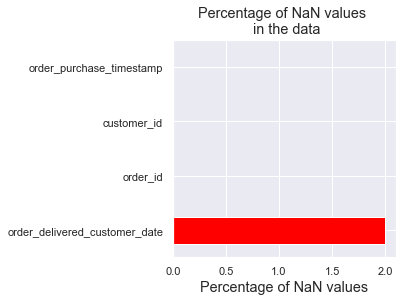

In [144]:
graph_nan_values_per_column(olist_orders_df, (4,4))

There are 2965 missing values in the variable 'order_delivered_customer_date'. We will delete them.

In [145]:
olist_orders_df = olist_orders_df.dropna(axis='rows')

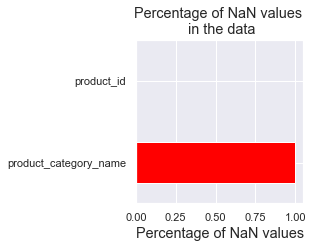

In [146]:
graph_nan_values_per_column(olist_products_df, (3,3))

There are 610 missing values in the variable 'product_category_name'. We will delete them.

In [147]:
olist_products_df = olist_products_df.dropna(axis='rows')

### Category name in english variables regroup 

In [148]:
product_category_name_translation_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [149]:
product_category_en = {#home
                        'furniture_living_room' : 'home',
                        'furniture_mattress_and_upholstery' : 'home',
                        'furniture_bedroom' : 'home',
                        'furniture_decor' : 'home',
                        'bed_bath_table' : 'home',
                        'kitchen_dining_laundry_garden_furniture' : 'home',
                        'la_cuisine' : 'home',
                        'home_confort' : 'home',
                        'home_comfort_2' : 'home',
                        'housewares' : 'home', 
                        #appliances
                        'small_appliances' : 'appliances',
                        'small_appliances_home_oven_and_coffee' : 'appliances',
                        'home_appliances_2' : 'appliances',
                        'home_appliances' : 'appliances',  
                        #construction
                        'construction_tools_construction': 'construction',
                        'costruction_tools_garden': 'construction',
                        'costruction_tools_tools': 'construction',
                        'construction_tools_safety': 'construction',
                        'construction_tools_lights': 'construction',
                        'home_construction': 'construction',
                        'air_conditioning': 'construction',
                        #office
                        'office_furniture' : 'office',
                        'industry_commerce_and_business' : 'office',
                        'stationery' : 'office',
                        'agro_industry_and_commerce' : 'office',
                        'signaling_and_security' : 'office',
                        'furnitures' : 'office',
                        'security_and_services' : 'office',
                        #electronics
                        'telephony' : 'electronics',
                        'electronics': 'electronics',
                        'computers_accessories': 'electronics',
                        'consoles_games': 'electronics',
                        'fixed_telephony': 'electronics',
                        'audio': 'electronics',
                        'computers': 'electronics',
                        'tablets_printing_image': 'electronics',
                        #sports_leisure
                        'sports_leisure' : 'sports_leisure',
                        #arts
                        'musical_instruments': 'arts',
                        'books' : 'arts',
                        'books_imported': 'arts',
                        'books_general_interest': 'arts',
                        'books_technical': 'arts',
                        'art': 'arts',
                        'toys': 'arts',
                        'cine_photo': 'arts',
                        'cds_dvds_musicals': 'arts',
                        'music': 'arts',
                        'dvds_blu_ray': 'arts',
                        'arts_and_craftmanship': 'arts',
                        #fashion
                        'watches_gifts' : 'fashion',
                        'luggage_accessories': 'fashion',
                        'fashion_bags_accessories' : 'fashion',
                        'fashion_underwear_beach' : 'fashion',
                        'fashion_shoes' : 'fashion', 
                        'fashion_male_clothing' : 'fashion',
                        'fashio_female_clothing' : 'fashion',
                        'fashion_sport' : 'fashion',
                        'fashion_childrens_clothes' : 'fashion',
                        #health_beauty
                        'health_beauty' : 'health_beauty', 
                        'baby': 'health_beauty',
                        'diapers_and_hygiene' : 'health_beauty',
                        'perfumery' : 'health_beauty',
                        #garden and pets
                        'flowers' : 'garden_pets',
                        'pet_shop' : 'garden_pets',
                        'garden_tools' : 'garden_pets',
                        #auto
                        'auto' : 'auto',
                        #food_drinks
                        'food_drink' : 'food_drinks',
                        'food' : 'food_drinks',
                        'drinks' : 'food_drinks',
                        #other
                        'market_place' : 'other', 
                        'cool_stuff' : 'other',
                        'party_supplies': 'other',
                        'christmas_supplies' : 'other'}

for key, value in product_category_en.items():
    product_category_name_translation_df['product_category_name_english']. \
        loc[product_category_name_translation_df["product_category_name_english"]. \
            str.contains(key, case=False, regex=False, na=False)] = value

### Exploration and treatment of duplicate values

#### olist_products_dataset 

In [151]:
print ("The number of duplicate values in the variable 'product_id' of the products dataframe is: {}"\
        .format(olist_products_df.duplicated(subset=['product_id']).sum()))

The number of duplicate values in the variable 'product_id' of the products dataframe is: 0


#### olist_order_items_dataset  

In [152]:
print ("The number of duplicate values in the variable 'order_id' of the order items dataframe is: {}"\
        .format(olist_order_items_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the order items dataframe is: 13984


In [153]:
print ("The number of duplicate values in the variable 'product_id' of the order items dataframe is: {}"\
        .format(olist_order_items_df.duplicated(subset=['product_id']).sum()))

The number of duplicate values in the variable 'product_id' of the order items dataframe is: 79699


As we observed, there are duplicate values of 'product_id' and 'order_id'. This is because an order can have several products or items (also indicated in the 'order_item_id' variable), and the products are not necessarily the same for an order, as shown next.

In [154]:
olist_order_items_df[olist_order_items_df['order_item_id'] > 5]

,order_id,order_item_id,product_id
1598,03aba68b07658f28f29612641f08d4ba,6,e7cc48a9daff5436f63d3aad9426f28b
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4
2037,04993613aee4046caf92ea17b316dcfb,6,078e8db43688ea060cf754e7bd2b92e7
...,...,...,...
109128,f80549a97eb203e1566e026ab66f045b,8,d5991653e037ccb7af6ed7d94246b249
109129,f80549a97eb203e1566e026ab66f045b,9,d5991653e037ccb7af6ed7d94246b249
109130,f80549a97eb203e1566e026ab66f045b,10,d5991653e037ccb7af6ed7d94246b249
109587,f91234b89ca8c758b3d2be234acb0355,6,588ea3decc0d8e1d19ce6160c5b0da1b


In [155]:
olist_order_items_df[olist_order_items_df['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

,order_id,order_item_id,product_id
43082,62073ec6b54b8e6322037fc0f3591ad3,1,1eba879220bd0981a0e2fbab499ed4e1
43083,62073ec6b54b8e6322037fc0f3591ad3,2,8ed094bfe076c568f6bb10feada3f75d
43084,62073ec6b54b8e6322037fc0f3591ad3,3,1eba879220bd0981a0e2fbab499ed4e1
43085,62073ec6b54b8e6322037fc0f3591ad3,4,8ed094bfe076c568f6bb10feada3f75d
43086,62073ec6b54b8e6322037fc0f3591ad3,5,1eba879220bd0981a0e2fbab499ed4e1
43087,62073ec6b54b8e6322037fc0f3591ad3,6,8ed094bfe076c568f6bb10feada3f75d
43088,62073ec6b54b8e6322037fc0f3591ad3,7,1eba879220bd0981a0e2fbab499ed4e1


The previous observations will be useul to perform further operations for the creation of new variables, such as number of items purchased in an order.

#### olist_geolocation_dataset 

In [157]:
print ("The number of duplicate values in the variable 'geolocation_zip_code_prefix' of the customers geolocation dataframe is: {}"\
        .format(olist_geolocation_df.duplicated(subset=['geolocation_zip_code_prefix']).sum()))

The number of duplicate values in the variable 'geolocation_zip_code_prefix' of the customers geolocation dataframe is: 981148


In [158]:
olist_geolocation_df[olist_geolocation_df.duplicated(['geolocation_zip_code_prefix'],keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607
...,...,...,...
1000158,99950,-28.068639,-52.010705
1000159,99900,-27.877125,-52.224882
1000160,99950,-28.071855,-52.014716
1000161,99980,-28.388932,-51.846871


In [159]:
olist_geolocation_df[olist_geolocation_df['geolocation_zip_code_prefix'] == 1037]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
14,1037,-23.545187,-46.637855
31,1037,-23.546705,-46.640336
169,1037,-23.543883,-46.638075
178,1037,-23.546157,-46.639885
236,1037,-23.543883,-46.638075
283,1037,-23.545199,-46.637916
417,1037,-23.545187,-46.637855
420,1037,-23.546723,-46.640281
433,1037,-23.546463,-46.640145


As we observed, we have duplicated values of the customers geolocation. Due to anonymity, we don't know the location of an specific customer. So in order to eliminate the duplicate values, we will perform a "group_by" zip_code_prefix and keep the median value of the latitude and longitude of each customer.

In [160]:
olist_geolocation_df = olist_geolocation_df.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"})

In [161]:
grouped_df_olist_geolocation = olist_geolocation_df.copy()

In [162]:
grouped_df_olist_geolocation = grouped_df_olist_geolocation.groupby("zip_code_prefix", as_index=False).agg({"geolocation_lat": np.median,
                                                                                                                        "geolocation_lng": np.median})

grouped_df_olist_geolocation = grouped_df_olist_geolocation.rename(columns={"geolocation_lat": "customer_geolocation_latitude",
                                                                            "geolocation_lng": "customer_geolocation_longitude"})

In [163]:
grouped_df_olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   zip_code_prefix                 19015 non-null  int64  
 1   customer_geolocation_latitude   19015 non-null  float64
 2   customer_geolocation_longitude  19015 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 445.8 KB


In [164]:
# print ("The number of duplicate values in the variable 'zip_code_prefix' of the orders dataframe is: {}"\
#         .format(grouped_df_olist_geolocation.duplicated(subset=['zip_code_prefix']).sum()))

#### olist_customers_dataset 

In [165]:
print ("The number of duplicate values in the variable 'customer_unique_id' of the customer dataframe is: {}"\
        .format(olist_customers_df.duplicated(subset=['customer_unique_id']).sum()))

The number of duplicate values in the variable 'customer_unique_id' of the customer dataframe is: 3345


In [166]:
olist_customers_df[olist_customers_df.duplicated(['customer_unique_id'],keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [167]:
olist_customers_df[olist_customers_df['customer_unique_id'] == '5cbfdb85ec130898108b32c50d619c39']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
54660,2985f6b30228725ea3b233e6c8b87735,5cbfdb85ec130898108b32c50d619c39,78640,canarana,MT
99406,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO


**As previously indicated, there are duplicated values of the customer_unique_id. This is because in Olist system, each order is assigned to a customer_unique_id. This means that the same customer will get different ids for different orders (order_id and customer_id). The purpose of having a customer_unique_id on the dataset is to allow to identify customers that made repurchases at the store. Otherwise we would find that each order had a different customer associated with.**

In [168]:
olist_customers_df = olist_customers_df.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"})

#### olist_orders_dataset 

We will verify if there are duplicate values for the order_id and customer_id keys.

In [169]:
print ("The number of duplicate values in the variable 'order_id' of the orders dataframe is: {}".format(olist_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the orders dataframe is: 0


In [170]:
print ("The number of duplicate values in the variable 'customer_id' of the orders dataframe is: {}".format(olist_orders_df.duplicated(subset=['customer_id']).sum()))

The number of duplicate values in the variable 'customer_id' of the orders dataframe is: 0


**We observed that there are not duplicate order_id and customer_id values. This is because there is only one order associated to each customer_id in the Olist orders dataset.**

#### olist_order_reviews_dataset 

We will verify if there are duplicate values from the order_id.

In [171]:
print ("The number of duplicate values in the variable 'order_id' of the order reviews dataframe is: {}"\
        .format(olist_order_reviews_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the order reviews dataframe is: 551


In [172]:
olist_order_reviews_df[olist_order_reviews_df.duplicated(['order_id'],keep=False)]

,review_id,order_id,review_score
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5
498,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2
764,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5
778,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3
...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4


In [173]:
olist_order_reviews_df[olist_order_reviews_df['order_id'] == 'cf73e2cb1f4a9480ed70c154da3d954a']

,review_id,order_id,review_score
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5


From the previous result we observe that for some orders there are several reviews. This may be attributed to the fact that some customers may have changed their review for an order.

#### olist_order_payments_dataset 

In [174]:
print ("The number of duplicate values in the variable 'order_id' of the payment methods dataframe is: {}"\
        .format(olist_order_payments_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the payment methods dataframe is: 4446


In [175]:
olist_order_payments_df[olist_order_payments_df.duplicated(['order_id'],keep=False)]

,order_id,payment_type,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,voucher,45.17
35,b2bb080b6bc860118a246fd9b6fad6da,credit_card,173.84
75,3689194c14ad4e2e7361ebd1df0e77b0,voucher,57.53
84,723e462ce1ee50e024887c0b403130f3,credit_card,13.80
102,21b8b46679ea6482cbf911d960490048,voucher,43.12
...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,credit_card,76.10
103817,6d4616de4341417e17978fe57aec1c46,credit_card,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,voucher,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,credit_card,238.16


In [176]:
olist_order_payments_df[olist_order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_type,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,voucher,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,credit_card,665.41


We have duplicate order_id values because a customer may pay an order with more than one payment method.

## Merge of tables by keys

### First merge - Products and orders

We will start by creating a new dataframe by performing a first merging of the Olist products dataset with the Olist order items dataset. We will do it by using the product_id key.

In [177]:
products_and_orders_items_df = pd.merge(olist_products_df, olist_order_items_df, on='product_id', how='left')

In [178]:
products_and_orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 111046
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   product_id             111047 non-null  object
 1   product_category_name  111047 non-null  object
 2   order_id               111047 non-null  object
 3   order_item_id          111047 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


### Second merge -  customers and their geolocation

We will merge olist customers dataset with the geolocation dataset.

In [179]:
olist_geolocation_df.head()

,zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951
3,1041,-23.544392,-46.639499
4,1035,-23.541578,-46.641607


The merge is made through zip_code_prefix to join the geolocation informations.

In [180]:
olist_customers_df.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [181]:
customers_geolocation_orders = pd.merge(grouped_df_olist_geolocation, olist_customers_df, on ='zip_code_prefix')

In [182]:
customers_geolocation_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   zip_code_prefix                 99163 non-null  int64  
 1   customer_geolocation_latitude   99163 non-null  float64
 2   customer_geolocation_longitude  99163 non-null  float64
 3   customer_id                     99163 non-null  object 
 4   customer_unique_id              99163 non-null  object 
 5   customer_city                   99163 non-null  object 
 6   customer_state                  99163 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


### Thirdth merge - customers geolocation information with orders dataset

The next merge that we will perform is by creating a new dataframe of the customers information including their geolocation and orders datasets by the customer_id key. 

In [183]:
customers_and_orders_df = pd.merge(customers_geolocation_orders, olist_orders_df, on='customer_id')

In [184]:
customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96212 entries, 0 to 96211
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   zip_code_prefix                 96212 non-null  int64  
 1   customer_geolocation_latitude   96212 non-null  float64
 2   customer_geolocation_longitude  96212 non-null  float64
 3   customer_id                     96212 non-null  object 
 4   customer_unique_id              96212 non-null  object 
 5   customer_city                   96212 non-null  object 
 6   customer_state                  96212 non-null  object 
 7   order_id                        96212 non-null  object 
 8   order_purchase_timestamp        96212 non-null  object 
 9   order_delivered_customer_date   96212 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.1+ MB


### Fourth merge - customers, orders and order reviews

We will perform a merge with the reviews dataset. 

In [185]:
print ("The number of duplicate values in the variable 'order_id' of the dataframe is: {}".format(customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the dataframe is: 0


In [186]:
reviews_customers_and_orders_df = pd.merge(olist_order_reviews_df, customers_and_orders_df, on='order_id')

In [187]:
reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96093 entries, 0 to 96092
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review_id                       96093 non-null  object 
 1   order_id                        96093 non-null  object 
 2   review_score                    96093 non-null  int64  
 3   zip_code_prefix                 96093 non-null  int64  
 4   customer_geolocation_latitude   96093 non-null  float64
 5   customer_geolocation_longitude  96093 non-null  float64
 6   customer_id                     96093 non-null  object 
 7   customer_unique_id              96093 non-null  object 
 8   customer_city                   96093 non-null  object 
 9   customer_state                  96093 non-null  object 
 10  order_purchase_timestamp        96093 non-null  object 
 11  order_delivered_customer_date   96093 non-null  object 
dtypes: float64(2), int64(2), object(

In [188]:
reviews_customers_and_orders_df.rename(columns={"review_score":"review_score_for_a_customer_order"},inplace=True)

### Fifth merge - customers, orders, order reviews and payment methods

We will perform a merge from the customers payment methods, customers information, orders, and order reviews datasets.

In [189]:
print ("The number of duplicate values in the variable 'order_id' of reviews, customers and orders dataframe is: {}"\
        .format(reviews_customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of reviews, customers and orders dataframe is: 526


In [190]:
payments_reviews_customers_and_orders_df = pd.merge(reviews_customers_and_orders_df, olist_order_payments_df, on='order_id')

In [191]:
payments_reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100373 entries, 0 to 100372
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   review_id                          100373 non-null  object 
 1   order_id                           100373 non-null  object 
 2   review_score_for_a_customer_order  100373 non-null  int64  
 3   zip_code_prefix                    100373 non-null  int64  
 4   customer_geolocation_latitude      100373 non-null  float64
 5   customer_geolocation_longitude     100373 non-null  float64
 6   customer_id                        100373 non-null  object 
 7   customer_unique_id                 100373 non-null  object 
 8   customer_city                      100373 non-null  object 
 9   customer_state                     100373 non-null  object 
 10  order_purchase_timestamp           100373 non-null  object 
 11  order_delivered_customer_date      1003

In [192]:
# payments_reviews_customers_and_orders_df[payments_reviews_customers_and_orders_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

# payments_reviews_customers_and_orders_df[payments_reviews_customers_and_orders_df['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

In [193]:
payments_reviews_customers_and_orders_df.rename(columns={"payment_value":"payment_value_for_a_customer_order"},inplace=True)

### Sixth merge - customers, orders, payments, reviews, and products (order items)

The following merge that we will perform will create a dataframe that contains information about the payments, reviews, customers, orders, products and order items datasets.

In [194]:
payments_reviews_customers_orders_products_order_items_df = pd.merge(products_and_orders_items_df, payments_reviews_customers_and_orders_df, on='order_id')

In [195]:
payments_reviews_customers_orders_products_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112935 entries, 0 to 112934
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   product_id                          112935 non-null  object 
 1   product_category_name               112935 non-null  object 
 2   order_id                            112935 non-null  object 
 3   order_item_id                       112935 non-null  int64  
 4   review_id                           112935 non-null  object 
 5   review_score_for_a_customer_order   112935 non-null  int64  
 6   zip_code_prefix                     112935 non-null  int64  
 7   customer_geolocation_latitude       112935 non-null  float64
 8   customer_geolocation_longitude      112935 non-null  float64
 9   customer_id                         112935 non-null  object 
 10  customer_unique_id                  112935 non-null  object 
 11  customer_city             

In [196]:
# payments_reviews_customers_orders_products_order_items_df[payments_reviews_customers_orders_products_order_items_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

# payments_reviews_customers_orders_products_order_items_df[payments_reviews_customers_orders_products_order_items_df['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

### Seventh merge - merge with the product category name in english

We will now include the product category name translation in English dataframe, and drop the column category name in Portuguese. We will then perform a regroup of categories to have a more clean data.

In [197]:
final_merge = pd.merge(payments_reviews_customers_orders_products_order_items_df, 
                        product_category_name_translation_df, on='product_category_name')

In [198]:
final_merge = final_merge.drop(columns=['product_category_name'])

In [199]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112912 entries, 0 to 112911
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   product_id                          112912 non-null  object 
 1   order_id                            112912 non-null  object 
 2   order_item_id                       112912 non-null  int64  
 3   review_id                           112912 non-null  object 
 4   review_score_for_a_customer_order   112912 non-null  int64  
 5   zip_code_prefix                     112912 non-null  int64  
 6   customer_geolocation_latitude       112912 non-null  float64
 7   customer_geolocation_longitude      112912 non-null  float64
 8   customer_id                         112912 non-null  object 
 9   customer_unique_id                  112912 non-null  object 
 10  customer_city                       112912 non-null  object 
 11  customer_state            

## Feature engineering

### Creation of number of orders of a customer

In [200]:
new_df_for_segmentation_analysis =  final_merge.copy()

In [201]:
# new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

# new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['customer_unique_id'] == '5cbfdb85ec130898108b32c50d619c39']

The same customer unique id (customer_unique_id) got different ids (customer_id and order_id) for different orders. This means that we can get the number of orders from a customer as follows.

In [203]:
new_df_for_segmentation_analysis = new_df_for_segmentation_analysis.sort_values(by='order_item_id', ascending=False)
new_df_for_segmentation_analysis = new_df_for_segmentation_analysis.drop_duplicates(subset='order_id', keep="first")

new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['customer_unique_id'] == '5cbfdb85ec130898108b32c50d619c39']

,product_id,order_id,order_item_id,review_id,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_value_for_a_customer_order,product_category_name_english
75590,53759a2ecddad2bb87a079a1f1519f73,d640a4c3a88331780424c072148b386d,2,c16b0bf102e75f1d2fdf39ea67f3e5bd,5,78640,-13.554457,-52.271173,2985f6b30228725ea3b233e6c8b87735,5cbfdb85ec130898108b32c50d619c39,canarana,MT,2018-03-14 13:42:40,2018-04-05 11:28:45,boleto,162.02,garden_pets
32497,acc444eb5ad26f79d5a11baa6a03c439,e65fa5f31ce4436d38bcf5e109fd43e4,1,09490ce09a832d45f17268af115c9e5c,5,74980,-16.822945,-49.244615,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,aparecida de goiania,GO,2018-01-24 17:53:44,2018-02-20 17:48:37,credit_card,159.77,home


In [204]:
new_df_for_segmentation_analysis['count'] = new_df_for_segmentation_analysis.groupby('customer_unique_id')['customer_unique_id'].transform('count')

In [205]:
new_df_for_segmentation_analysis.rename(columns = {"count":"number_of_orders_for_a_customer"}, inplace=True)

In [206]:
new_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_id                          94228 non-null  object 
 1   order_id                            94228 non-null  object 
 2   order_item_id                       94228 non-null  int64  
 3   review_id                           94228 non-null  object 
 4   review_score_for_a_customer_order   94228 non-null  int64  
 5   zip_code_prefix                     94228 non-null  int64  
 6   customer_geolocation_latitude       94228 non-null  float64
 7   customer_geolocation_longitude      94228 non-null  float64
 8   customer_id                         94228 non-null  object 
 9   customer_unique_id                  94228 non-null  object 
 10  customer_city                       94228 non-null  object 
 11  customer_state                      

<AxesSubplot:xlabel='number_of_orders_for_a_customer', ylabel='Count'>

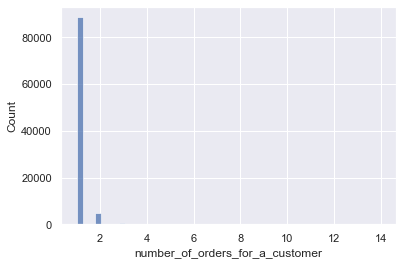

In [207]:
sns.histplot(data = new_df_for_segmentation_analysis, x = 'number_of_orders_for_a_customer', bins=50)

In [208]:
new_df_for_segmentation_analysis['number_of_orders_for_a_customer'].describe()

count    94228.000000
mean         1.074012
std          0.362468
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: number_of_orders_for_a_customer, dtype: float64

In [209]:
new_df_for_segmentation_analysis['number_of_orders_for_a_customer'].median()

1.0

As we observed the median of the number of orders is 1.

In [210]:
new_df_for_segmentation_analysis['number_of_orders_for_a_customer'].mean()

1.0740119709640445

As we observed the mean of the number of orders is ~1.

In [247]:
new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['number_of_orders_for_a_customer'] > 1].describe()

,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,payment_value_for_a_customer_order,number_of_orders_for_a_customer,number_of_items_for_a_customer,delay_days_purchase_delivery,olist_office_customer_distance
count,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000
mean,4.228973,33821.660404,-21.596670,-46.292672,143.573824,2.224583,1.399649,12.151010,674.064124
std,1.248773,29819.997401,5.090986,3.933373,172.701848,0.874628,0.925804,8.416475,556.444942
min,1.000000,1005.000000,-33.690972,-67.843457,0.000000,2.000000,1.000000,1.000000,0.661641
25%,4.000000,9723.000000,-23.590672,-47.982867,57.740000,2.000000,1.000000,7.000000,340.609128
50%,5.000000,22775.000000,-22.949477,-46.630412,99.430000,2.000000,1.000000,10.000000,477.676804
75%,5.000000,52011.000000,-20.635630,-43.821270,169.870000,2.000000,2.000000,15.000000,774.227823
max,5.000000,99750.000000,2.808802,-34.825319,4950.340000,14.000000,15.000000,88.000000,3371.420482


In [248]:
new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['number_of_orders_for_a_customer'] > 2].describe()

,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,payment_value_for_a_customer_order,number_of_orders_for_a_customer,number_of_items_for_a_customer,delay_days_purchase_delivery,olist_office_customer_distance
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,4.451169,34661.093535,-21.375540,-46.094124,147.923989,3.759285,1.709766,11.722146,719.221632
std,1.029868,29484.862211,5.596389,4.171513,167.953984,1.815481,1.178177,7.634007,608.301600
min,1.000000,1239.000000,-31.754573,-63.865050,0.000000,3.000000,1.000000,1.000000,0.698737
25%,4.000000,9993.000000,-23.617639,-47.946607,53.015000,3.000000,1.000000,7.000000,343.291561
50%,5.000000,24230.000000,-22.930150,-46.593817,97.390000,3.000000,1.000000,11.000000,528.816947
75%,5.000000,55293.000000,-20.367679,-43.334464,172.400000,4.000000,2.000000,14.000000,765.268645
max,5.000000,97670.000000,-2.499473,-34.835533,1202.640000,14.000000,8.000000,68.000000,2737.108151


As we observed 6% of the customers placed more than 1 order. Then 0.8% made more than 2 orders.

### Creation of number of items of an order

As pointed out before, since an order can have more than one item of the same product, we can perform some operations to obtain new variables. We need to obtain the number of items per order an add it as a column.

In [212]:
new_df_for_segmentation_analysis['max'] = new_df_for_segmentation_analysis.groupby('customer_unique_id')['order_item_id'].transform('max')

new_df_for_segmentation_analysis = new_df_for_segmentation_analysis.drop(columns=['order_item_id'])

new_df_for_segmentation_analysis.rename(columns={"max":"number_of_items_for_a_customer"},inplace=True)

In [213]:
new_df_for_segmentation_analysis[new_df_for_segmentation_analysis['order_id'] == '62073ec6b54b8e6322037fc0f3591ad3']

,product_id,order_id,review_id,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_value_for_a_customer_order,product_category_name_english,number_of_orders_for_a_customer,number_of_items_for_a_customer
75742,1eba879220bd0981a0e2fbab499ed4e1,62073ec6b54b8e6322037fc0f3591ad3,b10a077c65ccd8cab33e94a06beb13fe,2,26460,-22.677025,-43.596491,368f207cdc8f5c93a2b2a5d4cce96ba8,f9172a6495d46451776be8bc8e46032d,japeri,RJ,2018-04-02 12:22:06,2018-04-24 20:36:50,credit_card,1316.14,office,1,7


<AxesSubplot:xlabel='number_of_items_for_a_customer', ylabel='Count'>

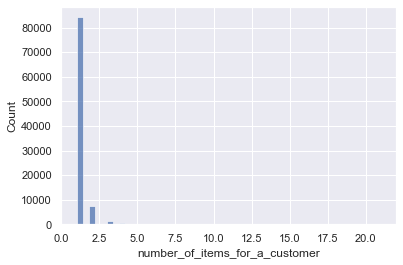

In [214]:
sns.histplot(data = new_df_for_segmentation_analysis, x = 'number_of_items_for_a_customer', bins=50)

In [215]:
new_df_for_segmentation_analysis['number_of_items_for_a_customer'].median()

1.0

In [216]:
new_df_for_segmentation_analysis['number_of_items_for_a_customer'].describe()

count    94228.000000
mean         1.152693
std          0.558876
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: number_of_items_for_a_customer, dtype: float64

In [217]:
new_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_id                          94228 non-null  object 
 1   order_id                            94228 non-null  object 
 2   review_id                           94228 non-null  object 
 3   review_score_for_a_customer_order   94228 non-null  int64  
 4   zip_code_prefix                     94228 non-null  int64  
 5   customer_geolocation_latitude       94228 non-null  float64
 6   customer_geolocation_longitude      94228 non-null  float64
 7   customer_id                         94228 non-null  object 
 8   customer_unique_id                  94228 non-null  object 
 9   customer_city                       94228 non-null  object 
 10  customer_state                      94228 non-null  object 
 11  order_purchase_timestamp            

### Creation of a variable with delay of days purchase-delivery

We will get the number of days that passed from the purchase date to the delivery date.

In [218]:
new_df_for_segmentation_analysis['order_purchase_timestamp'] = pd.to_datetime(new_df_for_segmentation_analysis['order_purchase_timestamp']).dt.date

new_df_for_segmentation_analysis['order_delivered_customer_date'] = pd.to_datetime(new_df_for_segmentation_analysis['order_delivered_customer_date']).dt.date

In [219]:
new_df_for_segmentation_analysis['delay_days_purchase_delivery'] = (new_df_for_segmentation_analysis['order_purchase_timestamp'] \
                                                                    - new_df_for_segmentation_analysis['order_delivered_customer_date']).dt.days.abs()

In [220]:
new_df_for_segmentation_analysis.head()

,product_id,order_id,review_id,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_value_for_a_customer_order,product_category_name_english,number_of_orders_for_a_customer,number_of_items_for_a_customer,delay_days_purchase_delivery
61236,79ce45dbc2ea29b22b5a261bbb7b7ee7,8272b63d03f5f79c56e9e4120aec44ef,e8236fe7b6e1bdd513a500de361e2b87,1,5882,-23.680171,-46.783830,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,SP,2017-07-16,2017-07-31,credit_card,196.11,health_beauty,1,21,15
59093,ee3d532c8a438679776d222e997606b3,1b15974a0141d54e36626dca3fdc731a,be332150a9c96e68c9565ea53cba2355,1,3029,-23.529755,-46.617584,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,2018-02-22,2018-03-05,boleto,2202.40,electronics,1,20,11
33154,89b190a046022486c635022524a974a8,428a2f660dc84138d969ccd69a0ab6d5,d638a70f2be180ef55395eabb78fd88c,5,84600,-26.229883,-51.088864,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,PR,2017-11-23,2017-12-13,credit_card,1225.65,home,2,15,20
73565,37eb69aca8718e843d897aa7b82f462d,9ef13efd6949e4573a18964dd1bbe7f5,2e3a6e4930334530774ac3a6f6b62388,5,74885,-16.728165,-49.208647,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,GO,2017-01-30,2017-02-14,credit_card,783.00,garden_pets,1,15,15
73115,422879e10f46682990de24d770e7f83d,73c8ab38f07dc94389065f7eba4f297a,ee4bc8e340e8648a44c2e33fee6b27e4,1,11065,-23.966109,-46.342984,d5f2b3f597c7ccafbb5cac0bcc3d6024,31e412b9fb766b6794724ed17a41dfa6,santos,SP,2017-12-13,2017-12-28,boleto,1014.02,garden_pets,1,14,15


In [249]:
new_df_for_segmentation_analysis['delay_days_purchase_delivery'].describe()

count    94228.000000
mean        12.443467
std          9.459214
min          0.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        208.000000
Name: delay_days_purchase_delivery, dtype: float64

### Creation of a variable with customer-seller distance

In [221]:
new_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_id                          94228 non-null  object 
 1   order_id                            94228 non-null  object 
 2   review_id                           94228 non-null  object 
 3   review_score_for_a_customer_order   94228 non-null  int64  
 4   zip_code_prefix                     94228 non-null  int64  
 5   customer_geolocation_latitude       94228 non-null  float64
 6   customer_geolocation_longitude      94228 non-null  float64
 7   customer_id                         94228 non-null  object 
 8   customer_unique_id                  94228 non-null  object 
 9   customer_city                       94228 non-null  object 
 10  customer_state                      94228 non-null  object 
 11  order_purchase_timestamp            

We will calculate the distance between customers and Olist building coordinates.

https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/

https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [222]:
from math import *

# Olist location: See reference: https://www.addressschool.com/company/220256/olist
olist_lat = -25.43045
olist_lon = -49.29207

In [223]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 6371 # radius of the earth (6371 km)
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [224]:
# Haversine distance between centre state and Olist office. Haversine distance is interpreted in kilometers

new_df_for_segmentation_analysis['olist_office_customer_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) \
                                                                        for x, y in zip(new_df_for_segmentation_analysis.customer_geolocation_latitude, 
                                                                                        new_df_for_segmentation_analysis.customer_geolocation_longitude)]

In [225]:
new_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_id                          94228 non-null  object 
 1   order_id                            94228 non-null  object 
 2   review_id                           94228 non-null  object 
 3   review_score_for_a_customer_order   94228 non-null  int64  
 4   zip_code_prefix                     94228 non-null  int64  
 5   customer_geolocation_latitude       94228 non-null  float64
 6   customer_geolocation_longitude      94228 non-null  float64
 7   customer_id                         94228 non-null  object 
 8   customer_unique_id                  94228 non-null  object 
 9   customer_city                       94228 non-null  object 
 10  customer_state                      94228 non-null  object 
 11  order_purchase_timestamp            

In [226]:
new_df_for_segmentation_analysis.head()

,product_id,order_id,review_id,review_score_for_a_customer_order,zip_code_prefix,customer_geolocation_latitude,customer_geolocation_longitude,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_value_for_a_customer_order,product_category_name_english,number_of_orders_for_a_customer,number_of_items_for_a_customer,delay_days_purchase_delivery,olist_office_customer_distance
61236,79ce45dbc2ea29b22b5a261bbb7b7ee7,8272b63d03f5f79c56e9e4120aec44ef,e8236fe7b6e1bdd513a500de361e2b87,1,5882,-23.680171,-46.783830,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,sao paulo,SP,2017-07-16,2017-07-31,credit_card,196.11,health_beauty,1,21,15,319.720579
59093,ee3d532c8a438679776d222e997606b3,1b15974a0141d54e36626dca3fdc731a,be332150a9c96e68c9565ea53cba2355,1,3029,-23.529755,-46.617584,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,2018-02-22,2018-03-05,boleto,2202.40,electronics,1,20,11,343.378906
33154,89b190a046022486c635022524a974a8,428a2f660dc84138d969ccd69a0ab6d5,d638a70f2be180ef55395eabb78fd88c,5,84600,-26.229883,-51.088864,10de381f8a8d23fff822753305f71cae,0f5ac8d5c31de21d2f25e24be15bbffb,uniao da vitoria,PR,2017-11-23,2017-12-13,credit_card,1225.65,home,2,15,20,200.600056
73565,37eb69aca8718e843d897aa7b82f462d,9ef13efd6949e4573a18964dd1bbe7f5,2e3a6e4930334530774ac3a6f6b62388,5,74885,-16.728165,-49.208647,adb32467ecc74b53576d9d13a5a55891,11f97da02237a49c8e783dfda6f50e8e,goiania,GO,2017-01-30,2017-02-14,credit_card,783.00,garden_pets,1,15,15,967.688544
73115,422879e10f46682990de24d770e7f83d,73c8ab38f07dc94389065f7eba4f297a,ee4bc8e340e8648a44c2e33fee6b27e4,1,11065,-23.966109,-46.342984,d5f2b3f597c7ccafbb5cac0bcc3d6024,31e412b9fb766b6794724ed17a41dfa6,santos,SP,2017-12-13,2017-12-28,boleto,1014.02,garden_pets,1,14,15,339.500844


In [250]:
new_df_for_segmentation_analysis['olist_office_customer_distance'].describe()

count    94228.000000
mean       717.591356
std        611.303698
min          0.661641
25%        340.892288
50%        495.149493
75%        818.129962
max       8594.471535
Name: olist_office_customer_distance, dtype: float64

## Visualization of some of the indicators

As follows, we will visualize some of the numerical variables distributions.

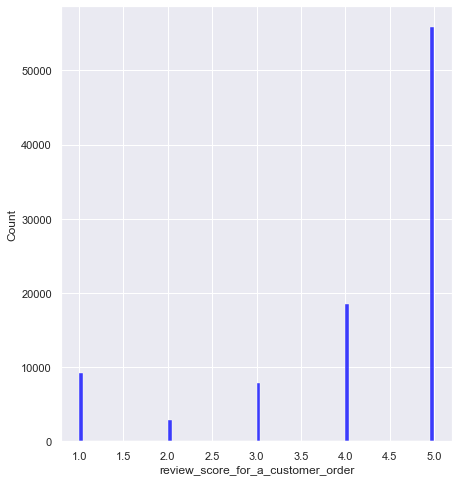

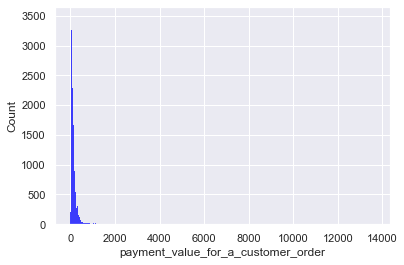

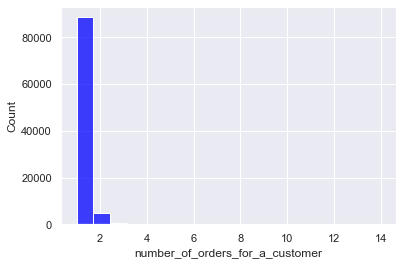

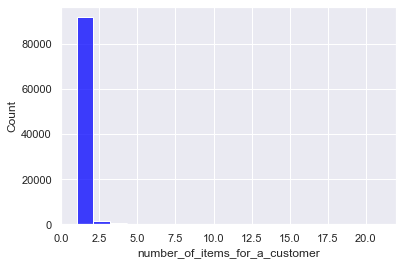

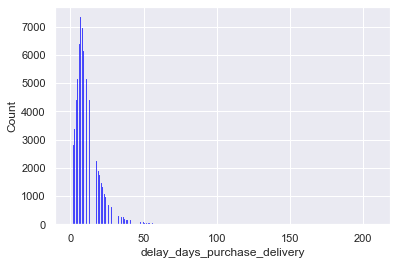

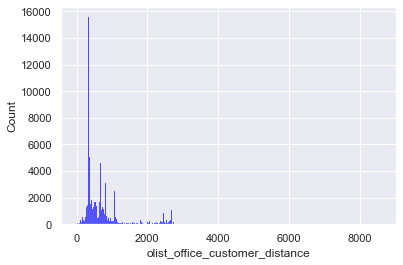

In [227]:
plt.subplots(figsize=(7, 8))

columns_histogram=['number_of_items_for_a_customer', 
                    'payment_value_for_a_customer_order', 
                    'review_score_for_a_customer_order', 
                    'number_of_orders_for_a_customer', 
                    'delay_days_purchase_delivery',
                    'olist_office_customer_distance']

for i in new_df_for_segmentation_analysis.columns:
    if i in columns_histogram:
        sns.histplot(data=new_df_for_segmentation_analysis, x=i, color="blue")
        plt.show()

In [251]:
new_df_for_segmentation_analysis['review_score_for_a_customer_order'].describe()

count    94228.000000
mean         4.157448
std          1.283207
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score_for_a_customer_order, dtype: float64

In [252]:
new_df_for_segmentation_analysis['payment_value_for_a_customer_order'].describe()

count    94228.000000
mean       157.112458
std        215.286394
min          0.000000
25%         60.010000
50%        103.005000
75%        174.802500
max      13664.080000
Name: payment_value_for_a_customer_order, dtype: float64

<AxesSubplot:xlabel='count', ylabel='product_category_name_english'>

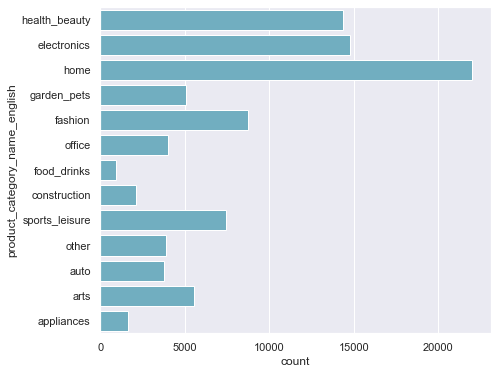

In [244]:
plt.subplots(figsize=(7, 6))
sns.countplot(y="product_category_name_english", data=new_df_for_segmentation_analysis, color="c")

<AxesSubplot:xlabel='count', ylabel='payment_type'>

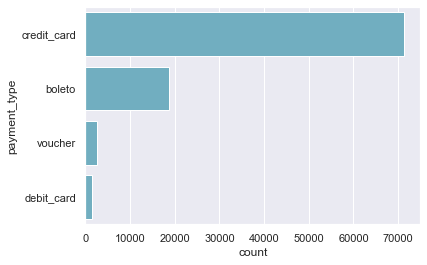

In [228]:
sns.countplot(y="payment_type", data=new_df_for_segmentation_analysis, color="c")

<AxesSubplot:xlabel='count', ylabel='customer_city'>

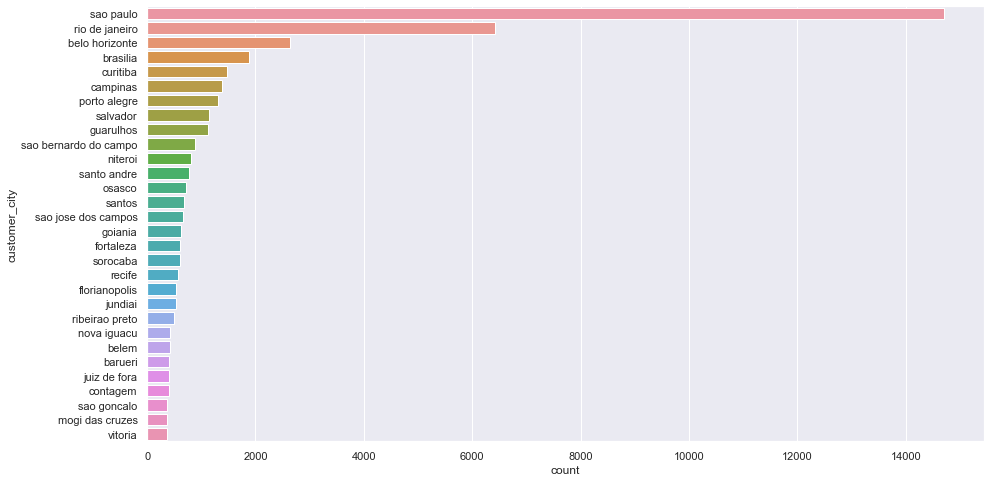

In [229]:
plt.figure(figsize=(15,8))
sns.countplot(y='customer_city', 
                data=new_df_for_segmentation_analysis, 
                order=new_df_for_segmentation_analysis['customer_city'].value_counts().iloc[:30].index)

In [230]:
new_df_for_segmentation_analysis['customer_city'].describe()

count         94228
unique         4028
top       sao paulo
freq          14712
Name: customer_city, dtype: object

<AxesSubplot:xlabel='count', ylabel='customer_state'>

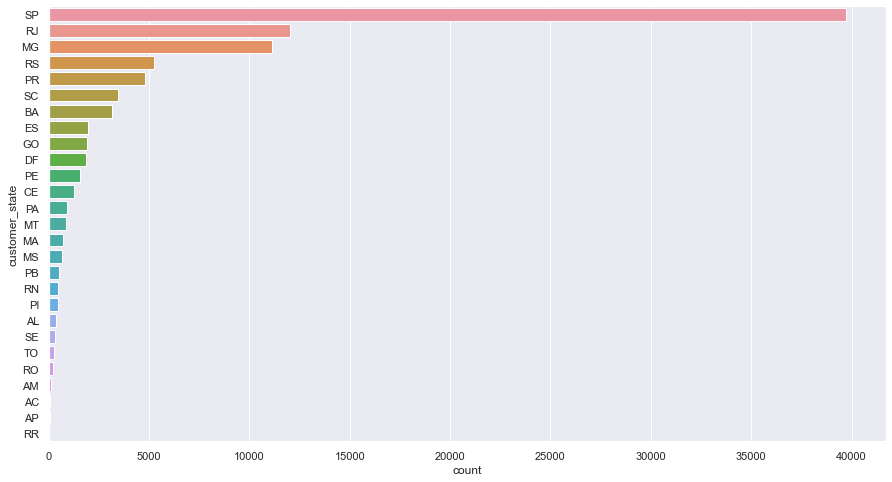

In [231]:
plt.figure(figsize=(15,8))
sns.countplot(y='customer_state', 
                data=new_df_for_segmentation_analysis, 
                order=new_df_for_segmentation_analysis['customer_state'].value_counts().iloc[:30].index)

In [232]:
new_df_for_segmentation_analysis['customer_state'].unique()

array(['SP', 'PR', 'GO', 'SC', 'MG', 'BA', 'RJ', 'RS', 'CE', 'PB', 'MT',
       'DF', 'TO', 'MS', 'AC', 'ES', 'MA', 'RO', 'AP', 'PE', 'SE', 'PI',
       'RN', 'AL', 'AM', 'PA', 'RR'], dtype=object)

## Base for the cluster maintenance analysis

We will analyse now how is the purche afluence in time according to the purchase timestamp variable. Fot this we will create a new dataframe that will contain the order purchase date, the order id and customer unique id for further purposes.

In [233]:
df_subset_for_purchase_dates = new_df_for_segmentation_analysis.copy()

In [234]:
columns_for_df_subset_for_purchase_dates = ['customer_unique_id', 'order_id', 'order_purchase_timestamp']

In [235]:
df_subset_for_purchase_dates = df_subset_for_purchase_dates[columns_for_df_subset_for_purchase_dates]
df_subset_for_purchase_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_unique_id        94228 non-null  object
 1   order_id                  94228 non-null  object
 2   order_purchase_timestamp  94228 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


We will now visualize the number of orders placed in time according to the order purchase timestamp from the dataset.

In [236]:
orders_per_days = df_subset_for_purchase_dates.groupby(df_subset_for_purchase_dates["order_purchase_timestamp"].\
                    astype('datetime64[ns]').dt.date).count()["order_id"]

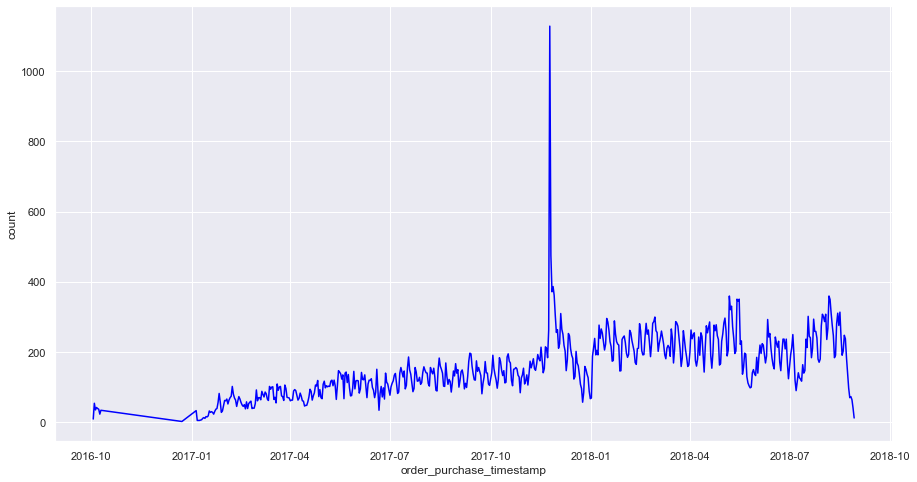

In [237]:
fig = plt.figure(figsize=(15, 8))
ax = orders_per_days.plot(color="blue")
ax.set_ylabel("count")

plt.show()

We observed an specific peak of order placements at the end of the year 2017, between November and December of 2017, and then a soft tendency of increase of orders afluence or sells in comparison with the begining of 2017.

Next, we will visualize the afluence of sells per month in the dataset. For this we will add a column dedicated to the month corresponding to the order purchase timestamp. It is importan to remark that such column will help us to visualize the month that has the higher number of orders within the three years of the dataset.

In [238]:
df_subset_for_purchase_dates['order_purchase_timestamp'] = df_subset_for_purchase_dates['order_purchase_timestamp'].\
                                                            astype('datetime64[ns]')

In [239]:
df_subset_for_purchase_dates.head()

,customer_unique_id,order_id,order_purchase_timestamp
61236,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16
59093,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,2018-02-22
33154,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,2017-11-23
73565,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,2017-01-30
73115,31e412b9fb766b6794724ed17a41dfa6,73c8ab38f07dc94389065f7eba4f297a,2017-12-13


In [240]:
df_subset_for_purchase_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        94228 non-null  object        
 1   order_id                  94228 non-null  object        
 2   order_purchase_timestamp  94228 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 4.9+ MB


In [241]:
df_subset_for_purchase_dates['date_month'] = [x.month for x in df_subset_for_purchase_dates['order_purchase_timestamp'].tolist()]

df_subset_for_purchase_dates['purchase_month'] = \
    df_subset_for_purchase_dates['date_month'].map({1: 'January',
                                                            2: 'February',
                                                            3: 'March',
                                                            4: 'April',
                                                            5: 'May',
                                                            6: 'June',
                                                            7: 'July',
                                                            8: 'August',
                                                            9: 'September',
                                                            10: 'October',
                                                            11: 'November',
                                                            12: 'December'})

df_subset_for_purchase_dates = df_subset_for_purchase_dates.drop(columns=['date_month'])

df_subset_for_purchase_dates.head()

,customer_unique_id,order_id,order_purchase_timestamp,purchase_month
61236,4546caea018ad8c692964e3382debd19,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16,July
59093,c402f431464c72e27330a67f7b94d4fb,1b15974a0141d54e36626dca3fdc731a,2018-02-22,February
33154,0f5ac8d5c31de21d2f25e24be15bbffb,428a2f660dc84138d969ccd69a0ab6d5,2017-11-23,November
73565,11f97da02237a49c8e783dfda6f50e8e,9ef13efd6949e4573a18964dd1bbe7f5,2017-01-30,January
73115,31e412b9fb766b6794724ed17a41dfa6,73c8ab38f07dc94389065f7eba4f297a,2017-12-13,December


<AxesSubplot:xlabel='count', ylabel='purchase_month'>

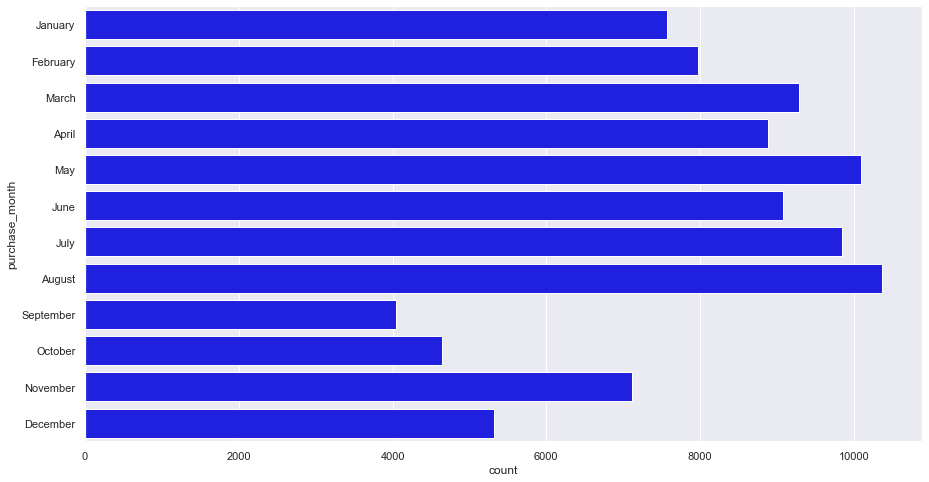

In [242]:
fig = plt.figure(figsize=(15, 8))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(y="purchase_month", data=df_subset_for_purchase_dates, order=Months, color="blue")

According to the previous graph, the month with more placed orders in the complete data is August. 

For a more detailed visualization, we could extract the data corresponding to 2018, which was the year that registered ascending sells and determine the month with more sells. 

We could also extract the data from september 2017 and september 2018, which could also let us explore the clients loyalty in a one year period.

## Pickling dataframe

Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. For more details, consult references:

In [243]:
# To pickle the dataframe

new_df_for_segmentation_analysis.to_pickle("./pickle_dataset_merged.pkl")

df_subset_for_purchase_dates.to_pickle("./pickle_dataset_time_analysis.pkl")